# Correr el código en Google Colab, NO EN JUPYTER NOTEBOOK

In [1]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.50~dfsg-5ubuntu4.7).
python3-tk is already the newest version (3.8.10-0ubuntu1~20.04).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install --upgrade PyPDF2==2.12.1

# necesitamos una versión anterior de PyPDF2 para que cmelot pueda leer archivos PDF

In [2]:
import camelot as cm  # libreria de camelot
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
from PyPDF2 import PdfFileReader
import re # expresiones regulares

## Uso de camelot 


In [3]:
tables = cm.read_pdf("/content/sample_data/Rendicion-de-cuentas-DP-2021.pdf", pages='10,11,12')


In [4]:
tables

<TableList n=2>

In [7]:
dir(tables
    )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compress_dir',
 '_format_func',
 '_tables',
 '_write_file',
 'export',
 'n']

In [9]:
dir(tables[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bbox',
 '_image',
 '_segments',
 '_text',
 '_textedges',
 'accuracy',
 'cells',
 'cols',
 'data',
 'df',
 'flavor',
 'order',
 'page',
 'parsing_report',
 'rows',
 'set_all_edges',
 'set_border',
 'set_edges',
 'set_span',
 'shape',
 'to_csv',
 'to_excel',
 'to_html',
 'to_json',
 'to_sqlite',
 'whitespace']

In [14]:
tables[0].cells 

# entrega las coordendads de la celda (solo dos: esquina superior derechas y la esquina inferior izquierda)

[[<Cell x1=79.43 y1=716.44 x2=94.54 y2=729.94>,
  <Cell x1=94.54 y1=716.44 x2=170.13 y2=729.94>,
  <Cell x1=170.13 y1=716.44 x2=211.16 y2=729.94>,
  <Cell x1=211.16 y1=716.44 x2=245.72 y2=729.94>,
  <Cell x1=245.72 y1=716.44 x2=280.99 y2=729.94>,
  <Cell x1=280.99 y1=716.44 x2=325.38 y2=729.94>,
  <Cell x1=325.38 y1=716.44 x2=360.66 y2=729.94>,
  <Cell x1=360.66 y1=716.44 x2=392.57 y2=729.94>,
  <Cell x1=392.57 y1=716.44 x2=435.29 y2=729.94>,
  <Cell x1=435.29 y1=716.44 x2=469.6 y2=729.94>,
  <Cell x1=469.6 y1=716.44 x2=504.87 y2=729.94>,
  <Cell x1=504.87 y1=716.44 x2=544.11 y2=729.94>],
 [<Cell x1=79.43 y1=703.54 x2=94.54 y2=716.44>,
  <Cell x1=94.54 y1=703.54 x2=170.13 y2=716.44>,
  <Cell x1=170.13 y1=703.54 x2=211.16 y2=716.44>,
  <Cell x1=211.16 y1=703.54 x2=245.72 y2=716.44>,
  <Cell x1=245.72 y1=703.54 x2=280.99 y2=716.44>,
  <Cell x1=280.99 y1=703.54 x2=325.38 y2=716.44>,
  <Cell x1=325.38 y1=703.54 x2=360.66 y2=716.44>,
  <Cell x1=360.66 y1=703.54 x2=392.57 y2=716.44>,
  <Cell

In [10]:
tables[0].data  # entrega cada fila de la tabla en formato lista 

[['CASOS POR TIPO SEGÚN SEDE DEFENSORIAL',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Sede defensorial',
  '',
  'Clasificación',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'TOTAL'],
 ['', '', 'Consulta', '', '', 'Petitorio', '', '', 'Queja', '', '', ''],
 ['',
  '',
  'Concluido',
  'Trámite',
  'Total',
  'Concluido',
  'Trámite',
  'Total',
  'Concluido',
  'Trámite',
  'Total',
  ''],
 ['1',
  'OD Lima',
  '43.954',
  '0',
  '43.954',
  '907',
  '75',
  '982',
  '3890',
  '909',
  '4799',
  '49.735'],
 ['2',
  'OD Callao',
  '4078',
  '0',
  '4078',
  '134',
  '1',
  '135',
  '1152',
  '54',
  '1206',
  '5419'],
 ['3',
  'OD La Libertad',
  '3195',
  '0',
  '3195',
  '536',
  '0',
  '536',
  '1055',
  '138',
  '1193',
  '4924'],
 ['4',
  'OD Tacna',
  '2783',
  '0',
  '2783',
  '667',
  '0',
  '667',
  '959',
  '1',
  '960',
  '4410'],
 ['5',
  'OD Áncash',
  '2895',
  '0',
  '2895',
  '262',
  '6',
  '268',
  '921',
  '130',
  '1051',
  '4214'],
 

In [18]:
tables[1].df

,0,1,2,3,4,5,6,7,8,9,10,11
0,RECURRENTES POR SEDE,,,,,,,,,,,
1,Sede defensorial,,Clasificación,,,,,,,,,Total
2,,,Consulta,,,Petitorio,,,Queja,,,
3,,,F,M,O,F,M,O,F,M,O,
4,1,OD Lima,22.037,21.751,186,456,377,44,1794,2599,134,49.378
5,2,OD Callao,2058,2008,12,78,54,3,317,423,21,4974
6,3,OD La Libertad,1603,1578,23,205,111,18,352,494,21,4405
7,4,OD Áncash,1731,1163,1,118,96,1,324,456,5,3895
8,5,OD Cusco,1214,1366,6,116,73,2,411,477,25,3690
9,6,OD Tacna,1520,1262,1,110,107,0,290,229,0,3519


### Stream and Lattice

Two table parsing methods

- Stream asume los especios en blanco como los separadores de las celdas
- Lattice identifica las lineas o segmentos para separar las celdas 

In [16]:
tables = cm.read_pdf("/content/sample_data/Rendicion-de-cuentas-DP-2021.pdf", pages = "11-13" , flavor = "lattice")

# tables = cm.read_pdf("/content/sample_data/Rendicion-de-cuentas-DP-2021.pdf", pages = "11,12,13" , flavor = "lattice")

In [17]:
tables[2].df

,0,1,2,3,4,5
0,,,Clasificación,,,TOTAL
1,Forma de ingreso,,Consulta,Petitorio,Queja,
2,1,Presencial,40.497,6612,16.612,63.721
3,2,Virtual– Telefónica,22.284,2881,6925,32.090
4,3,Virtual–Línea telefónica de emergencia 0800,18.081,1608,3014,22.703
5,4,Virtual–Correo institucional,8006,569,2773,11.348
6,5,Virtual–Formulario Virtual–Web,8066,93,1498,9657
7,6,Virtual– Facebook institucional,4180,269,863,5312
8,7,Virtual–Línea telefónica gratuita 0800,2818,108,321,3247
9,8,Virtual–Chat institucional,2586,245,393,3224


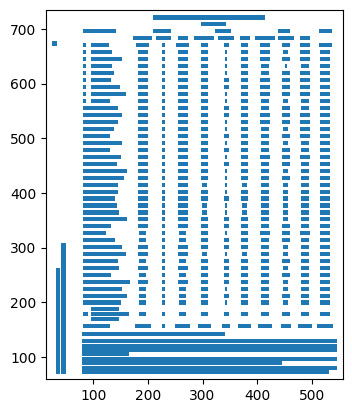

In [19]:
# identificación de texto 

cm.plot(tables[0], kind='text').show()

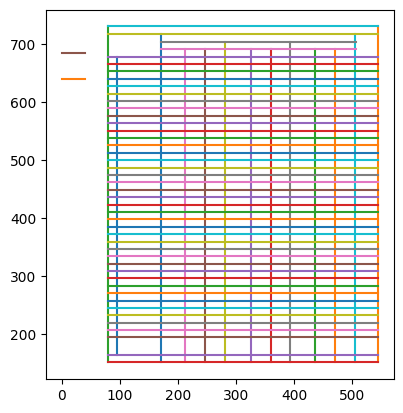

In [ ]:
# identificación de los segmentos que separan las celdas de la tabla


cm.plot(tables[0], kind='line').show()

In [30]:
# Seleccionar regiones de la tabla 

table_11 = cm.read_pdf("/content/sample_data/Rendicion-de-cuentas-DP-2021.pdf", pages = "11" , flavor = "lattice",
                     table_regions=['100,690,550,120'],  strip_text='\n')

# table regions: top left and bottom right [ x coordenada, y coordenada , x coordenada, y coordenada]

# strip_text : borra caracteres especiales 

# En lugar de definir la region de la tabla, tambien pueden eliminar filas y columnas

In [31]:

table_11[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,,Concluido,Trámite,Total,Concluido,Trámite,Total,Concluido,Trámite,Total,
1,OD Lima,43.954,0,43.954,907,75,982,3890,909,4799,49.735
2,OD Callao,4078,0,4078,134,1,135,1152,54,1206,5419
3,OD La Libertad,3195,0,3195,536,0,536,1055,138,1193,4924
4,OD Tacna,2783,0,2783,667,0,667,959,1,960,4410
5,OD Áncash,2895,0,2895,262,6,268,921,130,1051,4214
6,OD Cusco,2581,0,2581,207,11,218,1054,197,1251,4050
7,OD Ayacucho,2003,0,2003,218,13,231,1120,385,1505,3739
8,OD Lambayeque,1906,0,1906,338,0,338,1186,101,1287,3531
9,OD Puno,2467,0,2467,296,0,296,744,19,763,3526


In [33]:
data = table_11[0].df

In [34]:
data.columns = data.iloc[0]
data = data[1:]
data

,,Concluido,Trámite,Total,Concluido,Trámite,Total,Concluido,Trámite,Total,
1,OD Lima,43.954,0,43.954,907,75,982,3890,909,4799,49.735
2,OD Callao,4078,0,4078,134,1,135,1152,54,1206,5419
3,OD La Libertad,3195,0,3195,536,0,536,1055,138,1193,4924
4,OD Tacna,2783,0,2783,667,0,667,959,1,960,4410
5,OD Áncash,2895,0,2895,262,6,268,921,130,1051,4214
6,OD Cusco,2581,0,2581,207,11,218,1054,197,1251,4050
7,OD Ayacucho,2003,0,2003,218,13,231,1120,385,1505,3739
8,OD Lambayeque,1906,0,1906,338,0,338,1186,101,1287,3531
9,OD Puno,2467,0,2467,296,0,296,744,19,763,3526
10,10 OD Arequipa,1922,0,1922,661,79,740,704,158,862,3524


In [35]:
data.columns = ['region', 'consulta_concluido', 'consulta_tramite', 'consulta_total', 'peritorio_oncluido', 'peritorio_tramite', 'peritorio_total',
       'queja_concluido', 'queja_tramite', 'queja_total', 'TOTAL']

In [36]:
data

,region,consulta_concluido,consulta_tramite,consulta_total,peritorio_oncluido,peritorio_tramite,peritorio_total,queja_concluido,queja_tramite,queja_total,TOTAL
1,OD Lima,43.954,0,43.954,907,75,982,3890,909,4799,49.735
2,OD Callao,4078,0,4078,134,1,135,1152,54,1206,5419
3,OD La Libertad,3195,0,3195,536,0,536,1055,138,1193,4924
4,OD Tacna,2783,0,2783,667,0,667,959,1,960,4410
5,OD Áncash,2895,0,2895,262,6,268,921,130,1051,4214
6,OD Cusco,2581,0,2581,207,11,218,1054,197,1251,4050
7,OD Ayacucho,2003,0,2003,218,13,231,1120,385,1505,3739
8,OD Lambayeque,1906,0,1906,338,0,338,1186,101,1287,3531
9,OD Puno,2467,0,2467,296,0,296,744,19,763,3526
10,10 OD Arequipa,1922,0,1922,661,79,740,704,158,862,3524


In [37]:
# aplicar REGEX

data['region'] = data['region'].map(lambda x: re.sub('[\dOD|MOD]','',x))

# se retira los dígitos y las palabras OD o MOD

<ipython-input-37-34cc109b8d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'] = data['region'].map(lambda x: re.sub('[\dOD|MOD]','',x))


In [38]:
data

,region,consulta_concluido,consulta_tramite,consulta_total,peritorio_oncluido,peritorio_tramite,peritorio_total,queja_concluido,queja_tramite,queja_total,TOTAL
1,Lima,43.954,0,43.954,907,75,982,3890,909,4799,49.735
2,Callao,4078,0,4078,134,1,135,1152,54,1206,5419
3,La Libertad,3195,0,3195,536,0,536,1055,138,1193,4924
4,Tacna,2783,0,2783,667,0,667,959,1,960,4410
5,Áncash,2895,0,2895,262,6,268,921,130,1051,4214
6,Cusco,2581,0,2581,207,11,218,1054,197,1251,4050
7,Ayacucho,2003,0,2003,218,13,231,1120,385,1505,3739
8,Lambayeque,1906,0,1906,338,0,338,1186,101,1287,3531
9,Puno,2467,0,2467,296,0,296,744,19,763,3526
10,Arequipa,1922,0,1922,661,79,740,704,158,862,3524


## References 

https://camelot-py.readthedocs.io/en/master/user/how-it-works.html